<a href="https://colab.research.google.com/github/Vamsikrishna1804/INFO-5505-Advanced-Machine-Learning-for-Data-Scientists-/blob/main/Muktinutalapati_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 A major clinically relevant question in this biomedical study is: What patient phenotypes can be automatically and reliably identified and used to predict the change of the ALSFRS slope over time?.

In [ ]:
#importing the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Loading the Dataset
df=pd.read_csv('ALS_TrainingData_2223.csv')
df

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.57180,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,...,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.01610,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,...,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.65100,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,...,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.57180,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,...,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.65100,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.257975,2.17065,0.000414,107.0,...,146.5,138.0,0.023217,2,2.0,0,0.003396,12,12.0,12,0.000000,-1768,2,313,283.5,268.0,4.6,3.75,3.5,0.001824,101,96.0,74,0.044776,4,4.0,3,0.001698,143.0,140.0,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,0.009107,46.0,27.0,18.0,0.049123,38,27.0,23.0,0.026316,31.0,28.0,23.0,0.014035,5.4765,3.65100,2.92080,0.004484,85,78.0,70,0.027322,150,115.0,100,0.091

This dataset consists of 2223 rows and 101 columns

In [ ]:
#Printing all 101 columns 
for names in df.columns:
  print(names)


ID
Age_mean
Albumin_max
Albumin_median
Albumin_min
Albumin_range
ALSFRS_slope
ALSFRS_Total_max
ALSFRS_Total_median
ALSFRS_Total_min
ALSFRS_Total_range
ALT.SGPT._max
ALT.SGPT._median
ALT.SGPT._min
ALT.SGPT._range
AST.SGOT._max
AST.SGOT._median
AST.SGOT._min
AST.SGOT._range
Bicarbonate_max
Bicarbonate_median
Bicarbonate_min
Bicarbonate_range
Blood.Urea.Nitrogen..BUN._max
Blood.Urea.Nitrogen..BUN._median
Blood.Urea.Nitrogen..BUN._min
Blood.Urea.Nitrogen..BUN._range
bp_diastolic_max
bp_diastolic_median
bp_diastolic_min
bp_diastolic_range
bp_systolic_max
bp_systolic_median
bp_systolic_min
bp_systolic_range
Calcium_max
Calcium_median
Calcium_min
Calcium_range
Chloride_max
Chloride_median
Chloride_min
Chloride_range
Creatinine_max
Creatinine_median
Creatinine_min
Creatinine_range
Gender_mean
Glucose_max
Glucose_median
Glucose_min
Glucose_range
hands_max
hands_median
hands_min
hands_range
Hematocrit_max
Hematocrit_median
Hematocrit_min
Hematocrit_range
Hemoglobin_max
Hemoglobin_median
Hemoglob

In [ ]:
#Datapreprocessing
#Finding the missing values in all 101 columns
df.isnull().sum()

ID                 0
Age_mean           0
Albumin_max        0
Albumin_median     0
Albumin_min        0
                  ..
trunk_min          0
trunk_range        0
Urine.Ph_max       0
Urine.Ph_median    0
Urine.Ph_min       0
Length: 101, dtype: int64

From the above results, it is evident that there are no missing values which says that dataset is cleaned and structured.

In [ ]:
#Descriptive Statistics of dataframe
df.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,0.026035,54.436257,32.993252,23.014800,0.071137,43.127755,29.076923,21.542465,0.049191,30.897301,26.963765,23.164327,0.016868,7.353054,5.558011,4.160875,0.007133,92.030589,81.113360,69.890688,0.047658,147.135403,129.579172,113.429600,0.071178,2.474835,2.345584,2.222855,0.000541,107.152182,...,144.289024,135.461130,0.038242,5.309942,4.049708,2.493477,0.006163,10.743140,9.703329,7.778228,0.006595,-682.995502,1.800720,285.301844,238.781601,208.382005,4.628367,4.189269,3.857323,0.001744,90.642375,76.973234,65.373819,0.053587,3.910031,3.592668,2.791273,0.002513,143.428880,140.145254,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,0.016156,44.829577,15.601925,11.231221,0.110889,35.288701,9.593911,7.395303,0.084100,3.164472,2.198824,2.408519,0.011280,2.319538,1.335236,1.354256,0.005070,8.758227,7.245578,8.443662,0.027282,15.754048,12.160938,11.195037,0.033110,0.180246,0.088418,0.172787,0.000481,2.616967,...,11.602846,14.890612,0.035134,2.244651,2.280781,2.124570,0.004372,1.897501,2.771850,3.740073,0.006128,411.800405,0.419334,70.175312,52.626504,49.321238,1.325412,0.243075,0.263050,0.002898,11.104866,8.437749,7.763446,0.027403,0.298516,0.612385,1.055428,0.002477,2.333157,1.789886,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,0.000000,10.000000,8.000000,1.600000,0.002747,11.000000,9.000000,1.000000,0.000000,20.000000,19.500000,2.500000,0.000000,2.920800,2.190600,0.584160,0.000000,70.000000,56.000000,20.

From the above descriptive statistics, it is evident that min, max and Median value scales are different which gives improper results in K-means clustering as it calculates the Euclidian distance between any data points that greater values have stronger influence. Therefore, standardization technique is performed.

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

In [ ]:
# creating scaled data into dataframe for convenience
scaled_data_df = pd.DataFrame(scaled_df)
scaled_data_df.columns = [i for i in df.columns]

scaled_data_df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,-1.742767,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,-0.301588,-0.679085,-0.704767,-0.446606,-0.453087,-0.343750,-0.164404,0.197134,-0.253516,-0.283619,0.471374,0.762330,0.049077,0.292860,1.169674,1.780659,-0.403233,-0.231902,0.260444,-0.105510,0.289532,0.816774,0.774854,1.391144,0.327228,0.111898,-1.414439,-0.013342,0.863965,0.706250,...,0.147495,0.506397,0.200822,1.198700,1.074563,0.709255,1.011076,-3.027367,-2.238477,-2.080167,1.082677,-0.825839,-1.909933,-1.614917,-1.326277,-1.143416,-0.096872,0.249901,0.542515,-0.000570,-1.048639,-1.063702,-0.563513,-0.217842,0.301454,-0.968019,0.197810,0.053311,1.959640,2.992342,2.300470,0.260968,-1.719279,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532
1,-1.741331,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,0.166537,-0.656774,-1.281749,-1.337181,-0.374515,-0.343750,-1.259094,-1.020129,-0.232796,0.348541,0.471374,0.762330,-0.414378,0.450297,-0.608052,-0.106928,0.098656,-1.373942,-0.429788,-0.697803,-0.694129,-0.453027,0.240235,-0.842491,-0.197758,-0.857276,-1.978932,-1.168779,-0.039684,0.324043,...,-1.059377,-0.501175,-0.592730,1.198700,1.513108,0.238466,0.643794,-0.918857,-0.614648,-1.010429,0.388826,0.830675,-1.909933,0.009951,0.479304,0.438409,0.280454,0.455645,0.162274,0.059556,-0.057859,-0.115369,-0.177000,-0.252168,0.301454,0.665307,0.197810,-0.289979,-0.612561,-1.198812,-0.278144,-0.489913,-1.718879,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151
2,-1.739896,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,-0.064100,-0.656774,-0.832985,-0.802836,-0.464480,-0.542158,-1.050582,-0.479123,-0.457607,1.296780,0.926265,0.347043,0.246046,-0.809203,-0.881549,-0.376583,-0.763966,-0.688718,-0.705880,-1.408555,0.085852,-1.722828,-1.610367,-2.093327,-0.531883,-0.026555,-0.567701,-0.157771,-0.105200,0.324043,...,0.837136,1.043769,-0.580331,-0.583715,-0.460344,-0.232324,-0.592848,-0.391730,-0.975499,-1.010429,0.672452,-1.209607,-1.909933,-0.745470,-0.490008,-0.839219,-0.398733,-0.778819,0.162274,-0.478576,-0.778426,-0.470994,-0.692351,-0.522019,0.301454,0.665307,1.145505,-1.014914,0.673540,1.595291,1.195350,-0.654169,-1.716861,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151
3,-1.738460,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,-0.685524,0.168760,1.731378,1.601718,-0.169287,0.081411,1.138799,1.549648,-0.199469,-2.496176,-3.167753,-1.314102,-0.832374,0.292860,1.853414,1.780659,-0.688597,-0.231902,-0.153695,0.012949,0.081281,0.181873,0.034613,0.587035,0.109797,-0.026555,-0.003208,0.041362,-0.138785,0.706250,...,0.061290,0.573569,-0.378758,-0.583715,-0.241072,-0.232324,-0.268864,0.662526,0.828

Calculating Descriptive Statistics of Scaled Dataframe

In [ ]:
scaled_data_df.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,...,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03
mean,-2.071617e-16,-1.760975e-16,-4.248364e-16,-5.649502e-16,-3.092943e-16,9.077060e-17,-1.718024e-17,-2.115567e-16,-9.159465e-17,3.419067e-16,1.138690e-17,-9.269338e-17,1.717774e-16,2.154022e-16,4.860659e-17,-3.961693e-17,1.598786e-17,5.951155e-16,-5.968135e-18,3.277948e-16,-5.948720e-16,1.489537e-16,-1.139689e-16,-3.542238e-16,4.280576e-16,5.633520e-17,-2.387254e-17,3.278979e-16,3.952079e-16,3.481402e-16,8.863555e-17,5.473954e-16,-9.572271e-16,-1.263547e-16,-1.593168e-16,-4.138240e-16,-1.572292e-15,1.306697e-15,-7.433949e-17,4.494356e-15,...,-5.823302e-17,7.225689e-16,6.370329e-17,1.066773e-16,1.420366e-16,8.929729e-17,4.037856e-17,6.652348e-17,-3.025520e-16,-1.391400e-16,4.984267e-17,-1.009838e-16,-1.948759e-16,2.325325e-16,1.485292e-16,1.086251e-16,2.620985e-16,2.094691e-15,2.341507e-15,3.056484e-17,-1.633122e-16,-6.867601e-16,-4.718698e-16,-1.291015e-16,-3.817609e-16,-6.910052e-16,2.274384e-16,-1.705039e-16,-5.029765e-15,-1.017575e-14,-4.276375e-15,-2.486390e-16,2.717874e-16,-2.351296e-16,2.389252e-16,1.001848e-16,1.131698e-16,1.143285e-15,9.369224e-17,-2.262398e-17
std,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,...,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.0002

Standardization is a technique in which all fields mean value is scaled to 0 and standard deviation equal to 1

Selecting variables for the application to K-means Model

Data frame has 101 columns which are very high number. Considering all the variables will not add effectiveness to model. Hence considering only model effective variables. 
More than half of the fields in the dataframe has min, median and max values. In order to reduce the number of variables, I will be considering median values.
There is also a technique called Principal component analysis (PCA) which reduces the dimensions in a dataframe. However for this dataset, i prefer considering median values rather than PCA. I will be dropping ID field as discrete variables will not add any value to the model.

In [ ]:
#Considering only median values from the dataframe
selected_variables = [c for c in df.columns if c.lower()[-3:] != 'min' and c.lower()[-3:] != 'max' and c.lower() != 'id']
print('selected variables: ', selected_variables)

selected variables:  ['Age_mean', 'Albumin_median', 'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_median', 'ALSFRS_Total_range', 'ALT.SGPT._median', 'ALT.SGPT._range', 'AST.SGOT._median', 'AST.SGOT._range', 'Bicarbonate_median', 'Bicarbonate_range', 'Blood.Urea.Nitrogen..BUN._median', 'Blood.Urea.Nitrogen..BUN._range', 'bp_diastolic_median', 'bp_diastolic_range', 'bp_systolic_median', 'bp_systolic_range', 'Calcium_median', 'Calcium_range', 'Chloride_median', 'Chloride_range', 'Creatinine_median', 'Creatinine_range', 'Gender_mean', 'Glucose_median', 'Glucose_range', 'hands_median', 'hands_range', 'Hematocrit_median', 'Hematocrit_range', 'Hemoglobin_median', 'Hemoglobin_range', 'leg_median', 'leg_range', 'mouth_median', 'mouth_range', 'onset_delta_mean', 'onset_site_mean', 'Platelets_median', 'Potassium_median', 'Potassium_range', 'pulse_median', 'pulse_range', 'respiratory_median', 'respiratory_range', 'Sodium_median', 'Sodium_range', 'SubjectID', 'trunk_median', 'trunk_range', 'Urine.

In [ ]:
print(len(selected_variables))

52


From 101 Variables, I will be considering only 52 variables for K-means clustering model building

Building K-Means Clustering Model

Considering the below mentioned 52 variables for model building: ['Age_mean', 'Albumin_median', 'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_median', 'ALSFRS_Total_range', 'ALT.SGPT._median', 'ALT.SGPT._range', 'AST.SGOT._median', 'AST.SGOT._range', 'Bicarbonate_median', 'Bicarbonate_range', 'Blood.Urea.Nitrogen..BUN._median', 'Blood.Urea.Nitrogen..BUN._range', 'bp_diastolic_median', 'bp_diastolic_range', 'bp_systolic_median', 'bp_systolic_range', 'Calcium_median', 'Calcium_range', 'Chloride_median', 'Chloride_range', 'Creatinine_median', 'Creatinine_range', 'Gender_mean', 'Glucose_median', 'Glucose_range', 'hands_median', 'hands_range', 'Hematocrit_median', 'Hematocrit_range', 'Hemoglobin_median', 'Hemoglobin_range', 'leg_median', 'leg_range', 'mouth_median', 'mouth_range', 'onset_delta_mean', 'onset_site_mean', 'Platelets_median', 'Potassium_median', 'Potassium_range', 'pulse_median', 'pulse_range', 'respiratory_median', 'respiratory_range', 'Sodium_median', 'Sodium_range', 'SubjectID', 'trunk_median', 'trunk_range', 'Urine.Ph_median']

Intially i will select number of clusters as 3.
K=3

In [ ]:
# Import k-mean clustering package from sklearn
from sklearn.cluster import KMeans
# Setting parameters for the k-means model by a dictionary unpacking operator 
kmeans_para= {'init':'k-means++', # set k-means++ initial algorithm that ensures a smarter initialization of the centroids
              'n_init': 10,
              'max_iter':  300, # the number of maximum iterations for each initialization
              'random_state': 42 # make sure we got the same set of pseudo random number each time we run.
              } 

# Build a k-means clustering model
kmeans_base = KMeans (n_clusters = 3, **kmeans_para)
 
# Fit the model into scaled data that we selected variables for input
kmeans_base.fit(scaled_data_df[selected_variables])

# Print SSE of the model:
print('SSE of the based model: ', kmeans_base.inertia_)

SSE of the based model:  101849.40095417094


SSE (sum squared error) is the sum of the squared differences between each observation and mean of the cluster that it was assigned to belong. Our SSE of the based model is too high. Increasing the number of clusters will reduce this SSE. However, it may not improve SSE much, because we do not expect to have too many clusters. That would be hard to interprete the formed clusters.Therefore, we can think about reducing some more variables first.

Our aim in this assignment is to address the question: **"What patient phenotypes can be automatically and reliably identified and used to predict the change of the ALSFRS slope over time?"** So we can investigate how other variable correlated with the ALSFRS slope.

In [ ]:
#calculating correlation score to ALSFRS to other fields
cor = pd.DataFrame(df.corrwith(df['ALSFRS_slope']), columns = [ 'score'])
print('Variables negatively correlated with ALSFRS_slope: ' )
print(cor[cor['score'] <= -0.2], '\n')
print('Variables positively correlated with ALSFRS_slope: ' )
print(cor[cor['score'] >= 0.2])

Variables negatively correlated with ALSFRS_slope: 
                       score
Albumin_range      -0.226123
ALSFRS_Total_range -0.819305
hands_range        -0.632350
Hemoglobin_range   -0.209774
leg_range          -0.584507
mouth_range        -0.553194
onset_delta_mean   -0.324307
pulse_range        -0.236961
respiratory_range  -0.432878
trunk_range        -0.686407 

Variables positively correlated with ALSFRS_slope: 
                        score
ALSFRS_slope         1.000000
ALSFRS_Total_median  0.247250
ALSFRS_Total_min     0.601810
hands_min            0.424107
leg_min              0.348967
mouth_median         0.244704
mouth_min            0.435538
respiratory_min      0.380749
trunk_min            0.488530


From the above correlation scores, I will be considering variables which correlation values lie between -0.2 to 0.2. I will be considering 19 variables for the final K-means clustering algorithm.


Based on the above correlation scores of others variables toward the ALSFRS_slope, we input into the model below variables:

Input: ['ALSFRS_slope', 'Albumin_range', 'ALSFRS_Total_range', 'hands_range', 'Hemoglobin_range', 'leg_range', 'mouth_range', 'onset_delta_mean', 'pulse_range', 'respiratory_range', 'trunk_range', 'ALSFRS_Total_median', 'ALSFRS_Total_min', 'hands_min', 'leg_min','mouth_median', 'respiratory_min', 'trunk_min', 'Age_mean']

k: To select an optimal k, we have to experiment a set of models with different k

#### Selecting an appropriate number of clusters
With k-means clustering algorithm, selecting a proper numer of clusters k is problematic. The selected k should be able to minimize the variability, distances among observations within clusters (SSE), but maximize the dissimility, distances among clusters. 

Two common methods to select a proper k are the elbow method, and the silhouette coefficient. Since none of them are better, but they should be used together to strengthen our decision. So here, we are going to find an appropriate k with both methods.

Selecting k by applying the elbow method

In [ ]:
# Select input variables based on the above correlation assumption
new_selected_var = ['ALSFRS_slope','Albumin_range', 'ALSFRS_Total_range', 'hands_range', 'Hemoglobin_range', 'leg_range', 'mouth_range', 'onset_delta_mean', 'pulse_range', 'respiratory_range', 'trunk_range', 'ALSFRS_Total_median', 'ALSFRS_Total_min', 'hands_min', 'leg_min','mouth_median', 'respiratory_min', 'trunk_min', 'Age_mean']

# Build and run a set of k-mean models over a range of k
sse=[]
for k in range (1,11):
  # build k-means models
  kmeans_k= KMeans (n_clusters = k, **kmeans_para)
  # fit the model into the data
  kmeans_k.fit(scaled_data_df[new_selected_var])
  # append the lowest sse value for each k assignment
  sse.append (kmeans_k.inertia_)

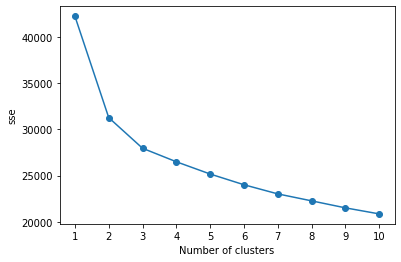

In [ ]:
# Visualize the elbow of sse
x=[i for i in range (1,11)]
y=sse
plt.plot(x, y, marker='o')
plt.xticks(x)
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

We can see SSE of the refined models is very much lower than the based model's.

Looking at the elbow plot, we see that k = 2 results a greater difference in SSE from its neighbors. But we also can consider k = 2, k=3, or k=4, since two clusters may cause clusters too general.

Let see their Silhouette coefficients.

*Selecting k by applying Silhouette coefficient *
This method measures the cohesion within clusters and disimilarity between cluster. This score ranges from -1 to 1. The greater the score is, the better the model performs.

In [ ]:
# Build and run a series of k-mean models over a range of k to get the Silhoutte coefficient

# import the library
from sklearn.metrics import silhouette_score

sil_cofs=[]
for k in range (2,11):
  # build k-means models
  kmeans_k = KMeans (n_clusters = k, **kmeans_para)
  # fit the model into the data
  kmeans_k.fit(scaled_data_df[new_selected_var])
  # get Silhouette coefficient score
  sil_cof_score = silhouette_score(scaled_data_df[new_selected_var],kmeans_k.labels_ )
  # append the silhouette score for each k assignment
  sil_cofs.append (sil_cof_score)

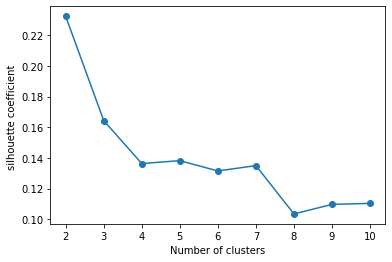

In [ ]:
# Visualize the silhoutte efficient for each k
x=[i for i in range (2,11)]
y=sil_cofs
plt.plot(x, y, marker='o')
plt.xticks(x)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette coefficient ')
plt.show()

The highest silhouette scores are for k=2, k=3, and k=5 respectively. However, two clusters  are often too few because its clusters would be too general. It seems k=3 is the optimum using these two validation methods.

From the above experiment, we select k = 3 for its good SSE, Silhouette score.

Inputs: ['ALSFRS_slope', 'Albumin_range', 'ALSFRS_Total_range', 'hands_range', 'Hemoglobin_range', 'leg_range', 'mouth_range', 'onset_delta_mean', 'pulse_range', 'respiratory_range', 'trunk_range', 'ALSFRS_Total_median', 'ALSFRS_Total_min', 'hands_min', 'leg_min','mouth_median', 'respiratory_min', 'trunk_min', 'Age_mean']
k = 3

In [ ]:
# Build a k-means clustering model with k =3
kmeans_k3 = KMeans (n_clusters = 3, **kmeans_para)

# fit the model into the scaled selected feature values
kmeans_k3.fit(scaled_data_df[new_selected_var])

# print the SSE of the model
print ('SSE of the final model: {:.2f}'.format(kmeans_k3.inertia_))

# apply the model to cluster the dataset
pred = kmeans_k3.predict(scaled_data_df[new_selected_var])

SSE of the final model: 27949.42


In [ ]:
# Observe the data sizes of the formed clusters
scaled_data_df['cluster'] = pred
scaled_data_df['cluster'].value_counts()

2    875
1    866
0    482
Name: cluster, dtype: int64

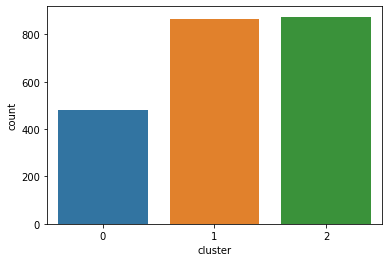

In [ ]:
# Plot the cluster sizes
sns.countplot(x='cluster', data=scaled_data_df)
plt.show()

From the above count plot, it is evident that all the clusters are well balanced.

**Cluster Interpretation**


Interpretability is especially important for k-means clustering, and unsupervised machine learning in general.

In [ ]:
# Print centroids of clusters
centroids  = kmeans_k3.cluster_centers_

# Turn it into a dataframe for observation 
centroids_df = pd.DataFrame(centroids, columns = new_selected_var )
print ('\t'*5, ' The Table of Centroids')
centroids_df


					  The Table of Centroids


,ALSFRS_slope,Albumin_range,ALSFRS_Total_range,hands_range,Hemoglobin_range,leg_range,mouth_range,onset_delta_mean,pulse_range,respiratory_range,trunk_range,ALSFRS_Total_median,ALSFRS_Total_min,hands_min,leg_min,mouth_median,respiratory_min,trunk_min,Age_mean
0,-1.260632,0.536276,1.446555,1.021645,0.503089,0.956851,1.173260,0.491530,0.489191,0.994635,1.131486,-0.610341,-1.087393,-0.621314,-0.597625,-0.656573,-0.877687,-0.778593,0.180780
1,0.663971,-0.159856,-0.780969,-0.686214,-0.212486,-0.476700,-0.537923,-0.116422,-0.221799,-0.494825,-0.693139,0.801546,1.002517,0.903143,0.730457,0.319564,0.516262,0.971849,0.081438
2,0.037286,-0.137200,-0.023909,0.116375,-0.066830,-0.055292,-0.113909,-0.155539,-0.049957,-0.058166,0.062722,-0.457091,-0.393207,-0.551599,-0.393737,0.045400,-0.027471,-0.532960,-0.180184


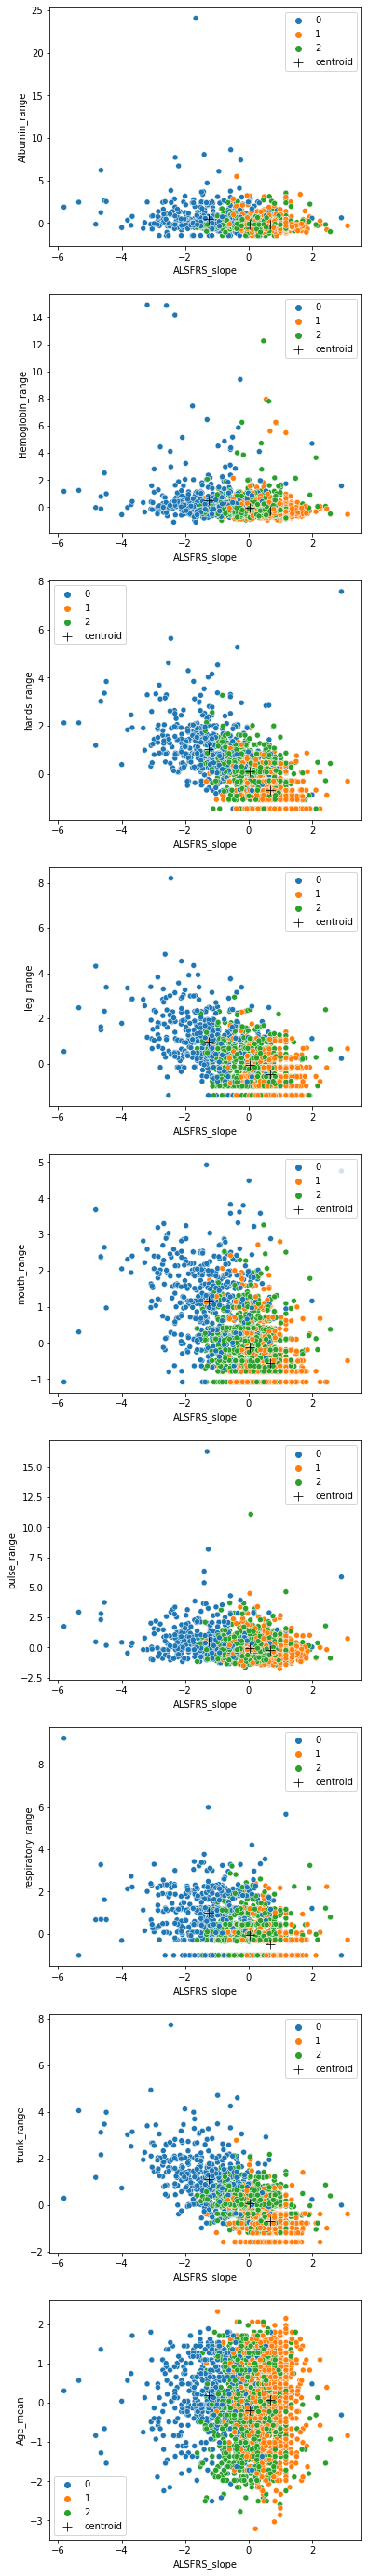

In [ ]:
# Plot centroids over the most important variables 

# Select some of the most important variables for visualizing
Y = ['Albumin_range','Hemoglobin_range', 'hands_range',  'leg_range', 'mouth_range', 'pulse_range', 'respiratory_range', 'trunk_range', 'Age_mean']

# Plot 9 sub-scatter plots
fig, ax = plt.subplots(9,1,figsize=(6,50))
for i,y in enumerate(Y):
  sns.scatterplot ( x='ALSFRS_slope',y=y, hue = 'cluster', palette= 'tab10', data = scaled_data_df, ax=ax[i])
  sns.scatterplot (  x='ALSFRS_slope' ,y= y,   color='Black', s = 100, marker="+",label = 'centroid', data = centroids_df, ax=ax[i])
  


**Model validation**


To validate this kind of unsupervised learning algorithm, we can test our assumptions about charecteristics of three formed clusters on a test set. If they are also true for the testing set, we could conclude that the k-means clustering we built is ready for deployment.

In [ ]:
# Load the test set
test_data = pd.read_csv('ALS_TestingData_78.csv')
test_data.head() 

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Basophils_max,Basophils_median,Basophils_min,Basophils_range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Bilirubin..total._max,Bilirubin..total._median,Bilirubin..total._min,Bilirubin..total._range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,BMI_max,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,...,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,0.028519,93,26.0,22,0.581967,72,24.0,21,0.418033,0.8,0.5,0.3,0.004098,27.0,25.0,23.0,0.032787,9.0,7.0,3.0,0.049180,7.9,7.1,5.7,0.018033,0.002969,91,76.0,69,0.180328,...,2,0.005520,-617,1,275,275.0,275,4.3,4.20,3.9,0.003279,90,77.0,61,0.237705,4700,4640,4450,2.049180,4,0.0,0,0.003680,139,138.0,137,0.016393,55888,7,0.0,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,0.039301,47,35.5,21,0.056769,49,33.0,20,0.063319,1.2,0.7,0.3,0.001965,26.7,25.0,21.0,0.012445,19.0,9.5,5.0,0.030568,5.7,4.3,3.4,0.005022,0.002907,106,96.0,75,0.067686,...,11,0.002183,-328,4,349,270.0,215,4.6,4.20,3.8,0.001747,104,80.0,68,0.078603,5800,5100,4700,2.401747,4,4.0,3,0.002183,144,140.5,135,0.019651,61505,6,3.0,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,0.017173,42,22.0,11,0.043115,37,22.0,14,0.031989,1.4,0.7,0.5,0.001252,27.0,24.0,20.0,0.009736,5.0,3.0,2.0,0.004172,8.2,5.4,2.9,0.007371,0.002281,85,72.5,65,0.026420,...,2,0.011889,-953,2,391,391.0,391,5.2,4.50,3.8,0.001947,123,103.5,70,0.070013,5130,4590,4190,1.307371,4,4.0,0,0.005284,141,139.0,136,0.006954,63255,0,0.0,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,0.033592,109,39.5,20,0.917526,83,42.0,23,0.618557,0.9,0.7,0.3,0.006186,27.0,26.0,25.0,0.020619,9.0,5.0,3.0,0.061856,7.5,5.2,3.9,0.037113,0.002408,67,59.0,54,0.134021,...,2,0.015504,-490,1,383,383.0,383,4.8,4.50,4.4,0.004124,76,73.0,63,0.134021,4190,3950,3780,4.226804,4,4.0,3,0.002584,143,140.0,138,0.051546,70641,8,5.5,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,0.000000,48,16.5,13,0.082938,272,25.0,22,0.592417,1.1,0.8,0.6,0.001185,27.4,22.9,19.3,0.019194,12.0,9.5,5.0,0.016588,7.5,6.1,4.5,0.007109,0.002731,102,85.0,69,0.078199,...,12,0.000000,-329,4,357,258.0,229,5.1,4.45,4.1,0.002370,84,67.5,59,0.059242,5000,4700,4400,1.421801,4,4.0,4,0.000000,146,144.0,140,0.014218,108342,7,7.0,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507


In [ ]:
#Descriptive statistics of Test data
test_data.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Basophils_max,Basophils_median,Basophils_min,Basophils_range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Bilirubin..total._max,Bilirubin..total._median,Bilirubin..total._min,Bilirubin..total._range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,BMI_max,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,...,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.00000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.00000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,51.589744,56.025571,45.256410,42.173077,38.910256,0.016753,-0.825866,29.807692,21.544872,14.705128,0.028159,59.076923,32.397436,22.358974,0.108998,48.333333,28.871795,21.089744,0.082340,1.515385,0.675000,0.319231,0.003285,27.921795,24.489103,21.187179,0.018107,12.27359,8.116795,5.198718,0.022924,7.719513,5.752032,4.204667,0.010031,0.002631,90.564103,80.141026,67.551282,0.057330,...,6.24359,0.007931,-516.589744,2.602564,311.884615,282.666667,261.153846,4.643590,4.169231,3.774359,0.002279,95.961538,78.769231,64.705128,0.076282,5070.512821,4716.474359,4360.128205,1.994449,3.846154,3.000000,1.897436,0.003678,143.192308,140.269231,137.448718,0.015560,523969.807692,5.666667,3.532051,1.871795,0.007133,7.076923,6.192308,5.564103,0.004544,9.341795,6.789103,5.286026,0.012203
std,28.468910,10.514606,3.056549,3.083341,3.977815,0.013419,0.649497,6.107389,8.995015,9.532050,0.014650,34.549708,14.820431,10.741320,0.142435,32.390742,9.358459,6.265108,0.114994,0.758857,0.210712,0.205798,0.003158,2.745700,2.202812,2.285718,0.011415,5.77224,3.241326,2.279081,0.037498,2.138344,1.524767,1.290092,0.007951,0.000405,8.730585,7.300995,7.315963,0.036190,...,4.24321,0.006029,217.304947,1.143471,78.767615,65.079605,71.993520,0.383622,0.216859,0.253513,0.001243,13.672840,9.881339,8.363664,0.047435,426.321924,372.235358,405.262441,2.020000,0.428738,1.258736,1.499695,0.003095,2.198333,1.483004,1.958315,0.009760,263604.275459,2.105445,2.511454,2.211886,0.003980,0.674570,0.572536,0.458392,0.004776,2.939529,1.683264,1.513861,0.014724
min,3.000000,24.583562,38.000000,35.000000,25.000000,0.004138,-3.041667,13.000000,2.000000,0.000000,0.000000,20.000000,14.500000,8.000000,0.015075,20.000000,16.000000,12.000000,0.013453,0.500000,0.300000,0.000000,0.000700,22.100000,20.000000,16.100000,0.005208,5.00000,3.000000,2.000000,0.003878,4

In [ ]:
#Scaling the test dataset and displaying descriptive statistics 
# Normalizing the test data
scaled_test_data= scaler.fit_transform(test_data)

# Turn scaled data into dataframe for the convenience
scaled_test_data_df = pd.DataFrame(scaled_test_data)
scaled_test_data_df.columns = [c for c in test_data.columns]

scaled_test_data_df.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Basophils_max,Basophils_median,Basophils_min,Basophils_range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Bilirubin..total._max,Bilirubin..total._median,Bilirubin..total._min,Bilirubin..total._range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,BMI_max,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,...,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
count,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,...,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01
mean,-8.255505e-17,-1.053289e-16,3.387604e-16,1.084602e-15,3.473005e-16,-3.017529e-16,1.081756e-16,1.850372e-16,-7.686159e-17,6.262797e-17,-2.177745e-16,-1.023932e-16,-1.423363e-18,7.116814e-17,1.893073e-16,-6.067084e-17,-4.198920e-17,-2.576287e-16,-7.116814e-19,5.124106e-17,2.818258e-16,1.366428e-16,3.131398e-17,-4.118411e-16,-2.615785e-15,1.184238e-15,-2.565612e-16,2.775558e-16,6.519002e-16,-4.796733e-16,-1.779204e-17,1.508765e-16,-5.679218e-16,-4.213154e-16,1.423363e-16,-1.935773e-16,-6.063526e-16,8.070467e-16,-9.472480e-16,-9.465363e-17,...,-3.558407e-19,1.363204e-16,-2.277381e-16,-6.547469e-17,3.519265e-16,-3.188333e-16,2.875193e-16,1.361091e-15,-1.203453e-15,1.807671e-16,3.053113e-16,-3.742110e-16,-4.359049e-16,1.373545e-16,6.120460e-17,4.184687e-16,-9.750036e-16,1.152924e-16,2.106577e-16,-2.149278e-16,-5.693451e-18,1.024821e-16,-3.928481e-16,6.032212e-15,-2.968423e-15,-3.774758e-15,-3.074464e-16,1.651101e-16,-1.508765e-16,3.273735e-17,-4.270089e-17,-7.650575e-17,3.985416e-16,-3.843080e-16,4.996004e-16,-6.760974e-17,-3.857313e-16,-7.358786e-16,1.423363e-17,6.405133e-17
std,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473e+00,1.006473

The data are standardized with same means of 0. Now it is ready for predicting.

In [ ]:
# Apply the final model to cluster the test set
pred_test = kmeans_k3.predict(scaled_test_data_df[new_selected_var])

# Join the labeled column into the test set
scaled_test_data_df['cluster'] = pred_test

# Observe the sizes of three clusters
scaled_test_data_df['cluster'].value_counts()

2    37
1    24
0    17
Name: cluster, dtype: int64

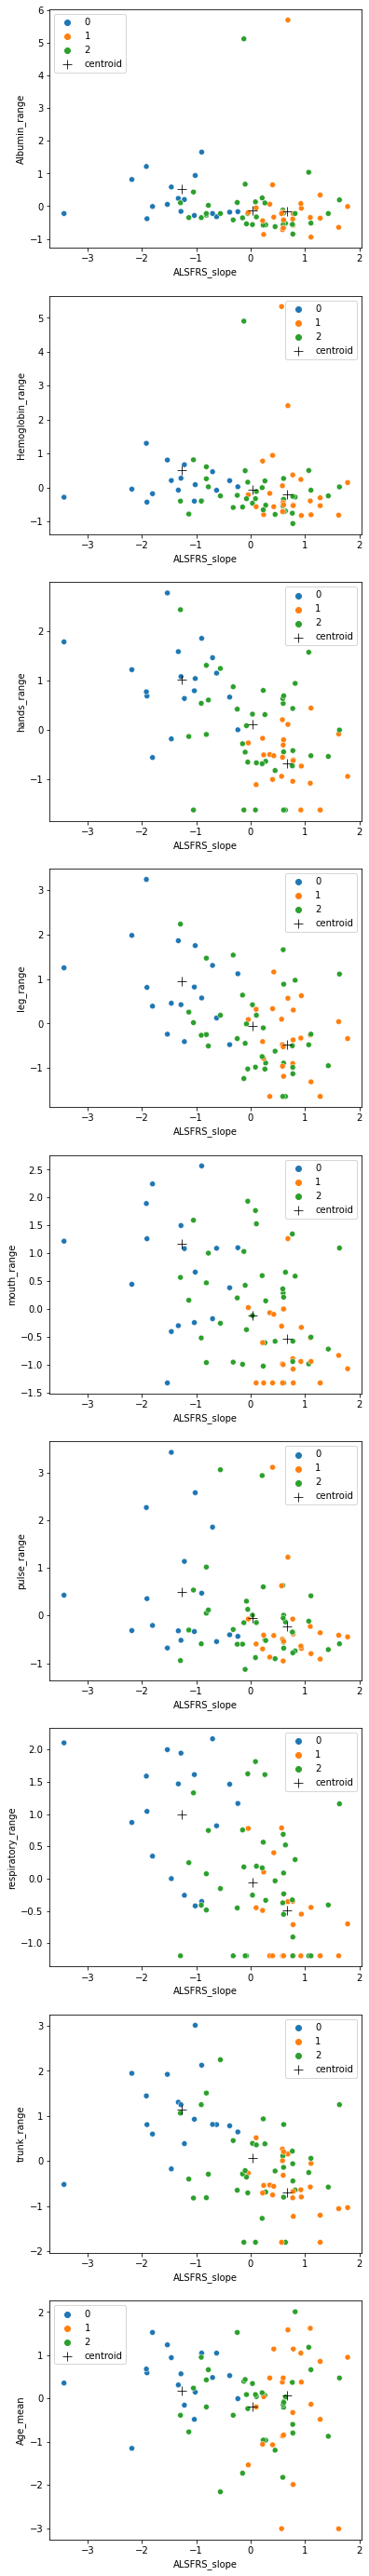

In [ ]:
# Visualize three formed clusters of the test set and models' centroids

# Plot test set in 9 most important variables 
Y = ['Albumin_range','Hemoglobin_range', 'hands_range',  'leg_range', 'mouth_range', 'pulse_range', 'respiratory_range', 'trunk_range', 'Age_mean']

# Plot 9 scatter sub-plots
fig, ax = plt.subplots(9,1,figsize=(6,50))
for i,y in enumerate(Y):
  sns.scatterplot ( x='ALSFRS_slope',y=y, hue = 'cluster', palette= 'tab10', data = scaled_test_data_df, ax=ax[i])
  sns.scatterplot (  x='ALSFRS_slope' ,y=y,   color='Black', s = 100, marker="+",label = 'centroid', data = centroids_df, ax=ax[i])

In [ ]:
# Checking the first cluster to test our assumptions
# Get a group sample of n=3 from each clusters, 
# then only print important variables that highly affects the ALSFRS slope
new_selected_var.append('cluster')
scaled_test_data_df.groupby('cluster').sample(n=3).sort_values(by=['cluster'])[new_selected_var]


,ALSFRS_slope,Albumin_range,ALSFRS_Total_range,hands_range,Hemoglobin_range,leg_range,mouth_range,onset_delta_mean,pulse_range,respiratory_range,trunk_range,ALSFRS_Total_median,ALSFRS_Total_min,hands_min,leg_min,mouth_median,respiratory_min,trunk_min,Age_mean,cluster
25,-1.907236,-0.384367,1.494595,0.688367,-0.432363,0.810499,1.261981,0.836422,0.355210,1.042790,0.807813,-0.844213,-1.235924,-0.829658,-0.778535,-0.437098,-1.273404,-0.851721,0.594959,0
18,-1.805374,-0.009423,1.165979,-0.561695,-0.184373,0.389671,2.244738,1.294952,-0.207379,0.348823,0.598964,0.050925,-0.496806,1.313167,-0.314980,-1.622964,0.068833,0.058337,1.529094,0
39,-0.626387,-0.322849,1.330175,1.152323,-0.083814,0.125923,1.090420,-0.080638,-0.545455,0.819606,0.808712,-0.005021,-0.707983,0.027472,-0.778535,-0.140632,-0.602286,-0.851721,1.050487,0
14,1.784788,-0.010607,-1.307127,-0.944229,0.143546,-0.338176,-1.069815,0.553893,-0.447902,-0.701036,-1.033986,1.225794,1.509371,0.884602,1.539242,1.045235,0.068833,1.878453,0.954504,1
71,0.569211,-0.224347,-0.677810,-0.943189,5.334205,0.097265,-0.306015,-1.525701,0.624752,0.786833,-1.803831,-0.060967,0.453488,0.027472,0.612131,0.155835,0.068833,0.513366,-3.007574,1
20,0.933203,-0.063612,-0.705293,-0.735303,-0.828842,0.624657,-0.328275,0.864212,-0.690524,-0.549501,-0.798288,0.722279,1.087018,1.741732,1.075686,0.452301,-0.602286,1.878453,0.380438,1
46,-0.321008,-0.419407,0.365718,0.875255,-0.590481,1.536977,-0.951280,-0.636431,-0.292426,-1.195987,0.454153,0.610387,0.453488,-0.829658,0.612131,1.045235,1.411069,-0.396692,-0.385333,2
6,0.606431,-0.434092,-1.118284,-1.626631,0.263888,-0.510440,-0.001658,-0.793906,0.007018,-0.552061,-0.802270,-0.564482,-0.180042,-0.829658,0.148575,0.007602,0.739951,-0.851721,-0.200184,2
29,-0.124221,5.126609,-0.770111,-1.626631,4.903109,-1.234957,1.033911,0.016626,-0.149614,0.181905,-1.803831,-1.179890,-1.130336,-0.829658,-0.778535,-0.733565,-0.602286,-0.851721,0.398271,2
